In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from matplotlib.animation import FuncAnimation
import matplotlib
import scipy.sparse as sps
from tqdm import tqdm
# matplotlib.rcParams['figure.figsize'] = [8, 7]

In [14]:
import os
os.chdir(r'/Volumes/GoogleDrive/My Drive/Classroom/DTU/Special Course/Report/figures/Analytical')

In [15]:
meshsize = 300
fs = np.linspace(0,0.8,meshsize)

In [16]:
c0 = 2.1
c = c0*np.ones((len(fs)))
k= 0.5

In [17]:
def lever(fs,c,k=k):
    size = len(fs)
    for i in range(1,size):
        c[i] = c[i-1] + (c[i-1]*(1-k))/(1+(k-1)*fs[i])*(fs[i]-fs[i-1])
    return c

def ana_lever(fs,c,k=k):
    c0 = c[0]
    c = c0/(1- fs*(1-k))
    return c

In [18]:
def scheil(fs,c,k=k):
    size = len(fs)
    for i in range(1, size):
        c[i] = c[i-1] + (c[i-1]*(1-k))/(1-fs[i])*(fs[i]-fs[i-1])
    return c
def ana_scheil(fs,c,k=k):
    c0 = c[0]
    c = c0*(1-fs)**(k-1)
    return c

In [19]:
c_lever = lever(fs.copy(),c.copy())
c_ana_lever = ana_lever(fs.copy(),c.copy())
c_scheil = scheil(fs.copy(),c.copy())
c_ana_scheil = ana_scheil(fs.copy(),c.copy())

In [20]:
meshsize = 100
fs2= np.linspace(0,0.8,meshsize)

In [21]:
c0 = 2.1
c2 = c0*np.ones((len(fs2)))
k= 0.5

In [22]:
c_lever2 = lever(fs2.copy(), c2.copy())
c_ana_lever2 = ana_lever(fs2.copy(), c2.copy())
c_scheil2 = scheil(fs2.copy(), c2.copy())
c_ana_scheil2 = ana_scheil(fs2.copy(), c2.copy())


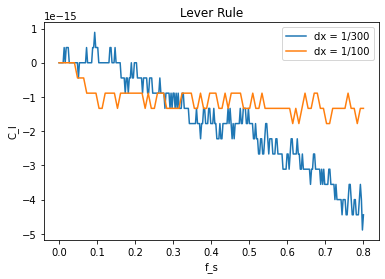

In [29]:
# plt.plot(fs,c_lever,label = 'Numerical')
# plt.plot(fs,c_ana_lever,label = 'Analytical')
plt.plot(fs, c_lever-c_ana_lever, label='dx = 1/300')
plt.plot(fs2, c_lever2-c_ana_lever2, label='dx = 1/100')

plt.xlabel('f_s')
plt.ylabel('C_l')
plt.title('Lever Rule')
plt.legend()
plt.savefig('Lever Rule Diff.png',bbox_inches='tight',dpi = 400)


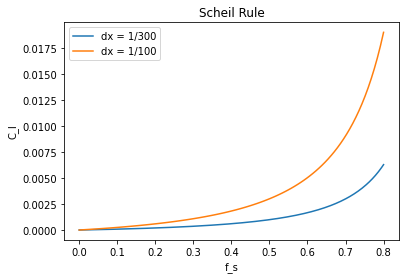

In [27]:
plt.plot(fs,c_scheil-c_ana_scheil,label='dx = 1/300')
plt.plot(fs2,c_scheil2-c_ana_scheil2,label='dx = 1/100')

plt.xlabel('f_s')
plt.ylabel('C_l')
plt.title('Scheil Rule')
plt.legend()
plt.savefig('Scheil Rule Diff.png', bbox_inches='tight', dpi=400)

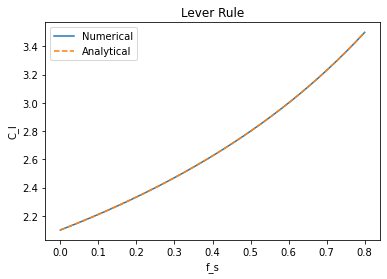

In [25]:
plt.plot(fs, c_lever, label='Numerical')
plt.plot(fs, c_ana_lever,'--', label='Analytical')
plt.xlabel('f_s')
plt.ylabel('C_l')
plt.title('Lever Rule')
plt.legend()
plt.savefig('Lever Rule.png', bbox_inches='tight', dpi=400)

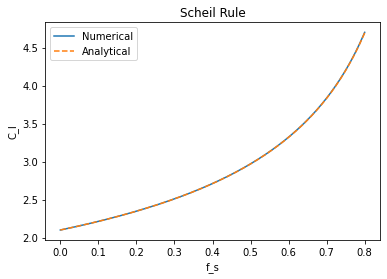

In [26]:
plt.plot(fs, c_scheil, label='Numerical')
plt.plot(fs, c_ana_scheil,'--', label='Analytical')
plt.xlabel('f_s')
plt.ylabel('C_l')
plt.title('Scheil Rule')
plt.legend()
plt.savefig('Scheil Rule.png', bbox_inches='tight', dpi=400)